In [1]:
!curl --output MNIST_digit_data.mat https://web.cs.ucdavis.edu/~hpirsiav/courses/MLw22/hw/hw1/MNIST_digit_data.mat

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 33.1M  100 33.1M    0     0  4944k      0  0:00:06  0:00:06 --:--:-- 4355k


Set new 1000 train/test data with only "1" & "6"

In [2]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

#Loading the data
M = loadmat('MNIST_digit_data.mat')
images_train,images_test,labels_train,labels_test= M['images_train'],M['images_test'],M['labels_train'],M['labels_test']

#just to make all random sequences on all computers the same.
np.random.seed(1)

#randomly permute data points
inds = np.random.permutation(images_train.shape[0])
images_train = images_train[inds]
labels_train = labels_train[inds]

inds = np.random.permutation(images_test.shape[0])
images_test = images_test[inds]
labels_test = labels_test[inds]

#if you want to use only the first 1000 data points.
# images_train = images_train[0:1000,:]
# labels_train = labels_train[0:1000,:]

# Set new 1000 train data with only "1" & "6"
images_train_new = images_train[0:1,:]
labels_train_new = labels_train[0:1,:]
count = 0
for i in range(0,len(labels_train)):
    if labels_train[i][0] == 1 or labels_train[i][0] == 6:
        if count == 0:
            images_train_new = images_train[i,:]
            labels_train_new = labels_train[i,:]
        else:
            images_train_new = np.vstack([images_train_new,images_train[i,:]])
            labels_train_new = np.vstack([labels_train_new,labels_train[i,:]])
        count = count + 1
        if count == 1000:
            break
            
# Set new 1000 test data with only "1" & "6"            
count = 0
for i in range(0,len(labels_test)):
    if labels_test[i][0] == 1 or labels_test[i][0] == 6:
        if count == 0:
            images_test_new = images_test[i,:]
            labels_test_new = labels_test[i,:]
        else:
            images_test_new = np.vstack([images_test_new,images_test[i,:]])
            labels_test_new = np.vstack([labels_test_new,labels_test[i,:]])
        count = count + 1 
        if count == 1000:
            break

print("images_train:",images_train.shape)
print("labels_train:",labels_train.shape)
print("images_test:",images_test.shape)
print("labels_test:",labels_test.shape)
print("---------------------")
print("images_train_new:",images_train_new.shape)
print("labels_train_new:",labels_train_new.shape)
print("images_test_new:",images_train_new.shape)
print("labels_test_new:",labels_train_new.shape)

# show the 10'th train image
# i=10
# im = images_train[i,:].reshape((28,28),order='F')
# plt.imshow(im)
# plt.title('Class Label:'+str(labels_train[i][0]))
# plt.show()

images_train: (60000, 784)
labels_train: (60000, 1)
images_test: (10000, 784)
labels_test: (10000, 1)
---------------------
images_train_new: (1000, 784)
labels_train_new: (1000, 1)
images_test_new: (1000, 784)
labels_test_new: (1000, 1)


# Part A

(a) Implement the perceptron algorithm for binary classification. Train and test it for classifying digits ”1” and ”6” in MNIST dataset. Note that we don’t need the data of other digits in this part. Please use 1000 training examples and 1000 testing examples. Plot the accuracy on the test set w.r.t. the number of iterations. Here, processing each data-point is considered one iteration, so 1000 iterations means one pass over all training data. Note that you should use exactly the same testing data to be able to compare the results.

Text(0, 0.5, 'Accuracy')

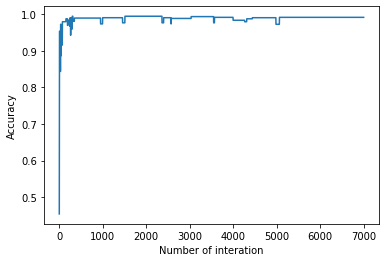

In [3]:
# set initial weights=[0,0,...0] weights:(1, 784)
weights =[]
for i in range(0, 784):
    weights = np.append(weights,[0])
# print(weights)

# perceptron

y_train = 0      # Set "1" = label -1 / "6" = label +1
y_pre_train = 0  # predict label
y_test = 0       # Set "1" = label -1 / "6" = label +1
y_pre_test = 0   # predict label

accuracy = []
epoch = 7
for j in range(0,epoch):
    for i in range(0,len(images_train_new)): # Training data
        predict = np.dot(images_train_new[i], weights)
        if labels_train_new[i] == 1:
            y_train = -1
        if labels_train_new[i] == 6:
            y_train = 1
        if predict > 0:
            y_pre_train = 1
        else: #predict <=0
            y_pre_train = -1
        if y_train != y_pre_train:
            weights = weights + y_train * images_train_new[i]

        # Test data
        count_acc = 0
        predict = 0
        for k in range(0,len(images_test_new)):
            predict = np.dot(images_test_new[k], weights)
            if labels_test_new[k] == 1:
                y_test = -1
            if labels_test_new[k] == 6:
                y_test = 1
            if predict > 0:
                y_pre_test = 1
            else: #predict <=0
                y_pre_test = -1
            if y_test == y_pre_test:
                count_acc = count_acc + 1
        
        accuracy.append(count_acc/len(images_test_new))
# print(accuracy)


#plot
from matplotlib import pyplot as plt
inter = list(range(1,epoch *1000 +1))
# print(inter)
plt.plot(inter,accuracy) 
plt.xlabel("Number of interation") 
plt.ylabel("Accuracy")

# Part B

(b) Visualize the learned model in the image form to see if it makes sense. Note that the weight vector has both positive and negative values, so you should plot those on two separate planes.

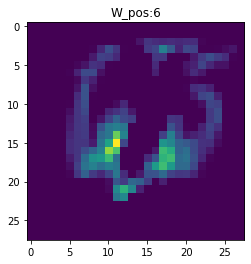

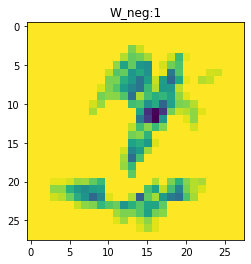

In [4]:
# Plot two separate planes of weight vector
# weights:(1, 784)
w_pos = weights.copy()
w_neg = weights.copy()
for i in range(0,len(weights)):
    if weights[i] < 0:
        w_pos[i] = 0
    else:
        w_neg[i] = 0
        
max_pos = max(w_pos)
min_neg = min(w_neg)
# print(w_pos)
# print(w_neg)

image_pos = w_pos.reshape((28,28),order='F')

plt.imshow(image_pos)
plt.title("W_pos:6")
plt.show()

image_neg = w_neg.reshape((28,28),order='F')
plt.imshow(image_neg)
plt.title("W_neg:1")
plt.show()

# Part C

(c) For each class, visualize the 20 best scoring and 20 worst scoring images that are classified as that class. The worst ones are close to the boundary and may be wrong.

Worst "6":


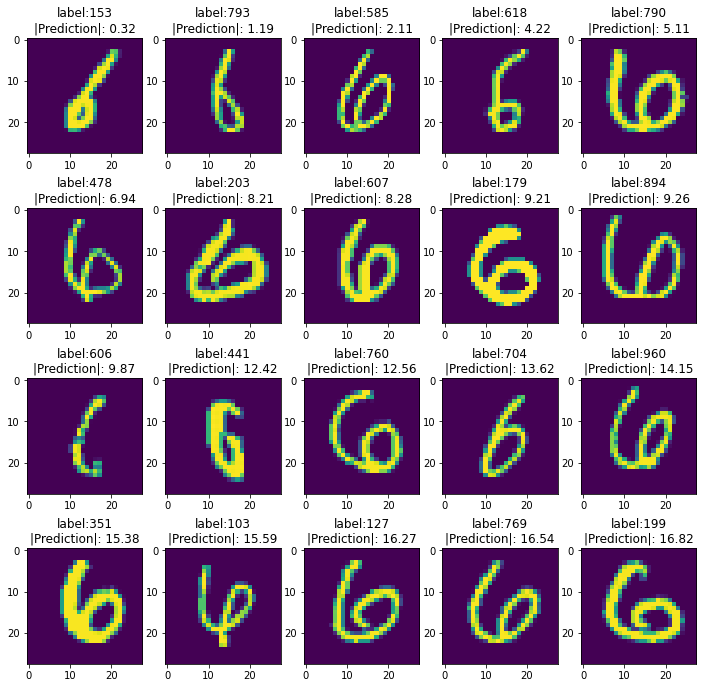

----------------------------------------------------------------------------------------------
Best "6":


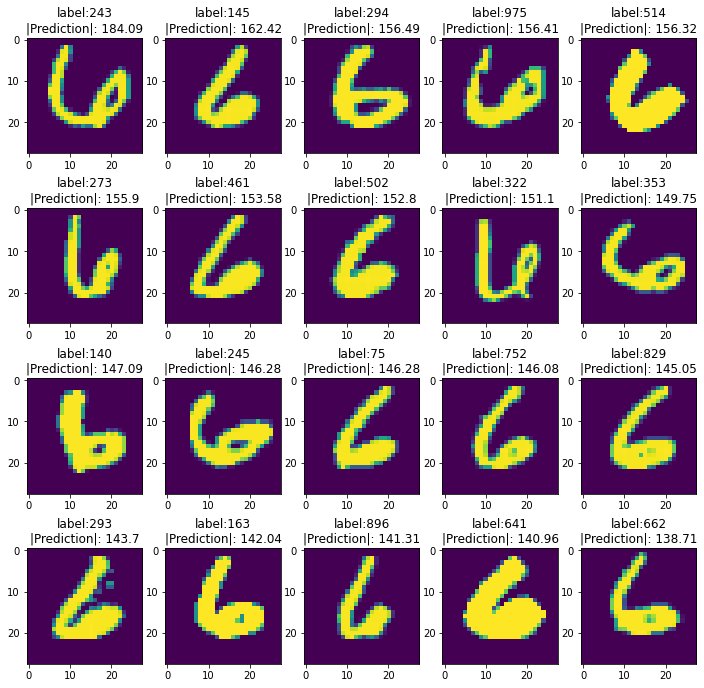

----------------------------------------------------------------------------------------------
Worst "1":


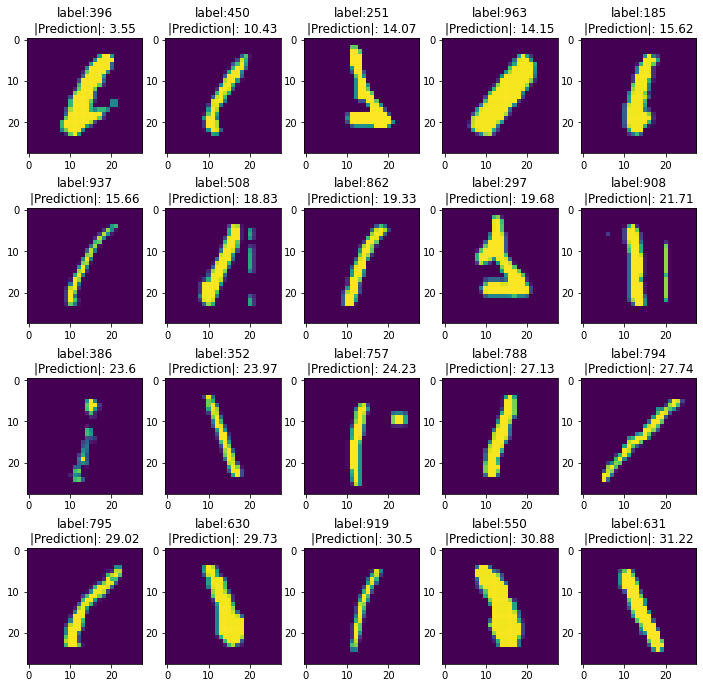

----------------------------------------------------------------------------------------------
Best "1":


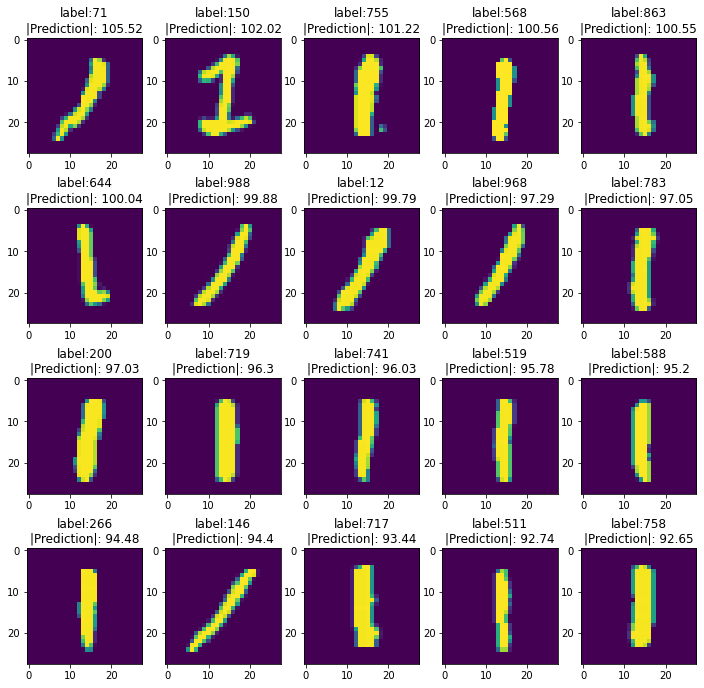

In [5]:
# Visualize the 20 best scoring and 20 worst scoring images
# Use the distance from boundary: Absolute value

six_predict = {}
one_predict = {}

for i in range(0,len(images_test_new)):
    predict = np.dot(images_test_new[i], weights)
    if labels_test_new[i] == 6:
        six_predict[abs(predict)] = i
    if labels_test_new[i] == 1:
        one_predict[abs(predict)] = i
        
# 6 worst
print("Worst \"6\":")
f, axs = plt.subplots(figsize=(12,12))
for j in range(0,20):
    six_worst = six_predict[min(six_predict)]
    images_out = images_test_new[six_worst,:].reshape((28,28),order='F')
    plt.subplot(4,5,j+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(images_out)
    plt.title("label:" + str(six_worst) + "\n|Prediction|: " + str(round(min(six_predict),2)))
    six_predict.pop(min(six_predict))

plt.show()
print("----------------------------------------------------------------------------------------------")

# 6 best
print("Best \"6\":")
f, axs = plt.subplots(figsize=(12,12))
for j in range(0,20):
    six_best = six_predict[max(six_predict)]
    images_out = images_test_new[six_best,:].reshape((28,28),order='F')
    plt.subplot(4,5,j+1)
    plt.imshow(images_out)
    plt.title("label:" + str(six_best) + "\n|Prediction|: " + str(round(max(six_predict),2)))
    six_predict.pop(max(six_predict))
plt.show()
print("----------------------------------------------------------------------------------------------")

# 1 worst
print("Worst \"1\":")
f, axs = plt.subplots(figsize=(12,12))
for j in range(0,20):
    one_worst = one_predict[min(one_predict)]
    images_out = images_test_new[one_worst,:].reshape((28,28),order='F')
    plt.subplot(4,5,j+1)
    plt.imshow(images_out)
    plt.title("label:" + str(one_worst) + "\n|Prediction|: " + str(round(min(one_predict),2)))
    one_predict.pop(min(one_predict))
plt.show()
print("----------------------------------------------------------------------------------------------")

# 1 best
print("Best \"1\":")
f, axs = plt.subplots(figsize=(12,12))
for j in range(0,20):
    one_best = one_predict[max(one_predict)]
    images_out = images_test_new[one_best,:].reshape((28,28),order='F')
    plt.subplot(4,5,j+1)
    plt.imshow(images_out)
    plt.title("label:" + str(one_best) + "\n|Prediction|: " + str(round(max(one_predict),2)))
    one_predict.pop(max(one_predict))
plt.show()

# Part D

(d) Randomly flip the label (add labeling error) for 10% of the training data and repeat (b) and (c).

In [6]:
# Set 10% label error in training data
import random
labels_train_error = labels_train_new.copy()
choose = random.sample(range(0, 1000), 100)
for i in choose:
    if labels_train_error[i] == 6:
        labels_train_error[i] = 1
    else:
        labels_train_error[i] = 6

Text(0, 0.5, 'Accuracy')

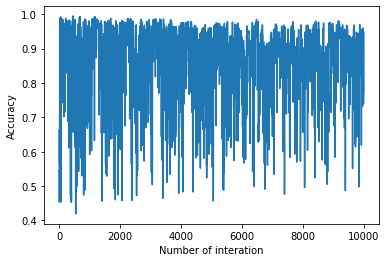

In [7]:
# Part A
# set initial weights=[0,0,...0] weights:(1, 784)
weights =[]
for i in range(0, 784):
    weights = np.append(weights,[0])
# print(weights)


# perceptron

y_train = 0      # Set "1" = label -1 / "6" = label +1
y_pre_train = 0  # predict label
y_test = 0       # Set "1" = label -1 / "6" = label +1
y_pre_test = 0   # predict label

accuracy = []
epoch = 10
for j in range(0,epoch):
    for i in range(0,len(images_train_new)): # Training data
        predict = np.dot(images_train_new[i], weights)
        if labels_train_error[i] == 1:
            y_train = -1
        if labels_train_error[i] == 6:
            y_train = 1
        if predict > 0:
            y_pre_train = 1
        else: #predict <=0
            y_pre_train = -1
        if y_train != y_pre_train:
            weights = weights + y_train * images_train_new[i]

        # Test data
        count_acc = 0
        predict = 0
        for k in range(0,len(images_test_new)):
            predict = np.dot(images_test_new[k], weights)
            if labels_test_new[k] == 1:
                y_test = -1
            if labels_test_new[k] == 6:
                y_test = 1
            if predict > 0:
                y_pre_test = 1
            else: #predict <=0
                y_pre_test = -1
            if y_test == y_pre_test:
                count_acc = count_acc + 1
        
        accuracy.append(count_acc/len(images_test_new))
# print(accuracy)


#plot
from matplotlib import pyplot as plt
inter = list(range(1,epoch *1000 +1))
# print(inter)
plt.plot(inter,accuracy) 
plt.xlabel("Number of interation") 
plt.ylabel("Accuracy")

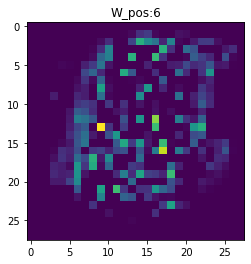

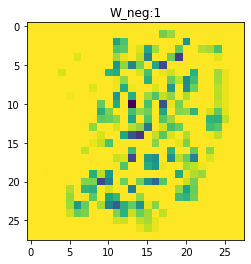

In [8]:
# Part B
# Plot two separate planes of weight vector
# weights:(1, 784)
w_pos = weights.copy()
w_neg = weights.copy()
for i in range(0,len(weights)):
    if weights[i] < 0:
        w_pos[i] = 0
    else:
        w_neg[i] = 0
        
max_pos = max(w_pos)
min_neg = min(w_neg)
# print(w_pos)
# print(w_neg)

image_pos = w_pos.reshape((28,28),order='F')

plt.imshow(image_pos)
plt.title("W_pos:6")
plt.show()

image_neg = w_neg.reshape((28,28),order='F')
plt.imshow(image_neg)
plt.title("W_neg:1")
plt.show()

Worst "6":


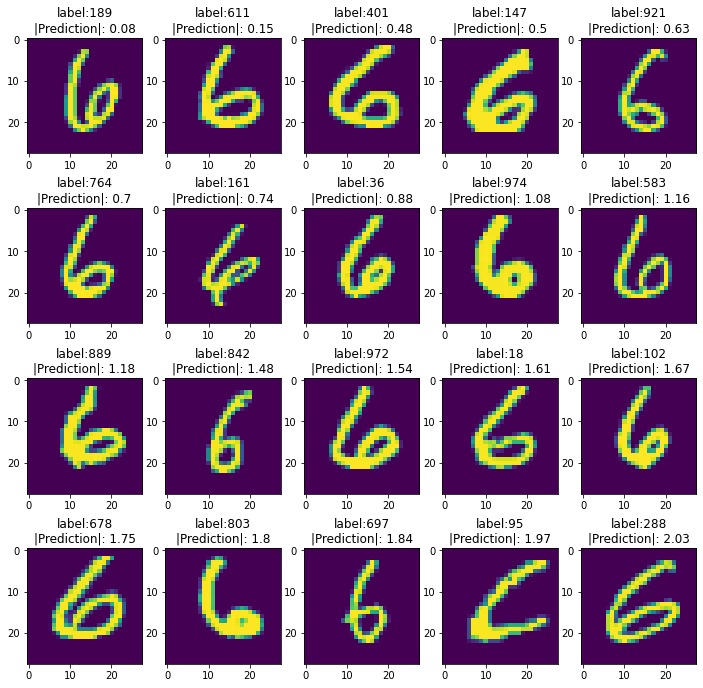

----------------------------------------------------------------------------------------------
Best "6":


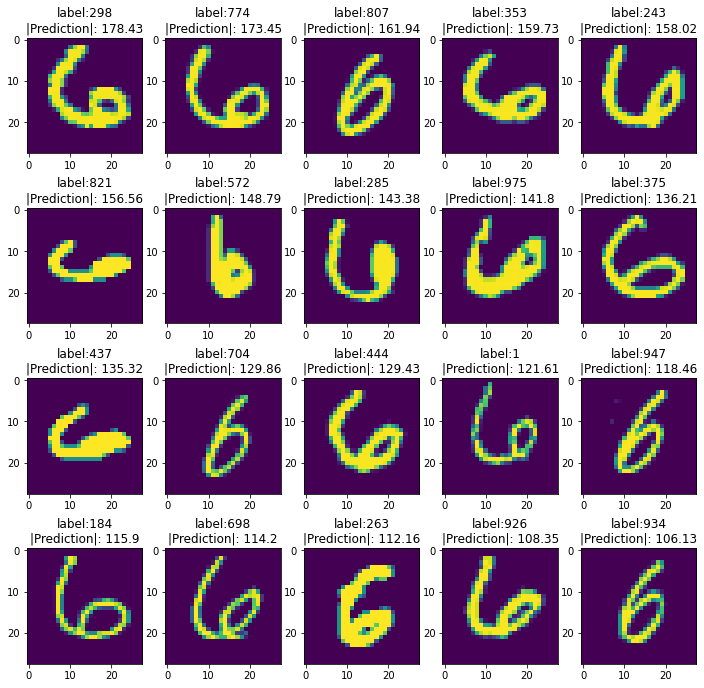

----------------------------------------------------------------------------------------------
Worst "1":


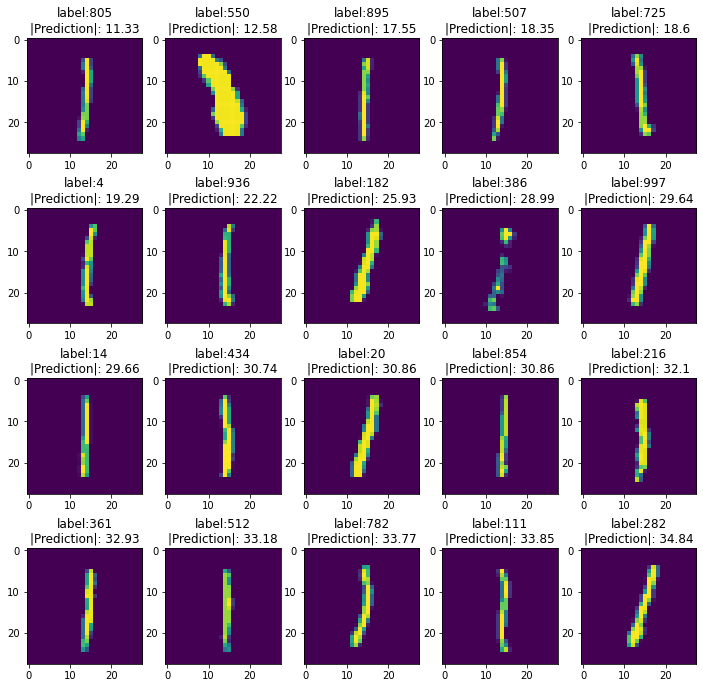

----------------------------------------------------------------------------------------------
Best "1":


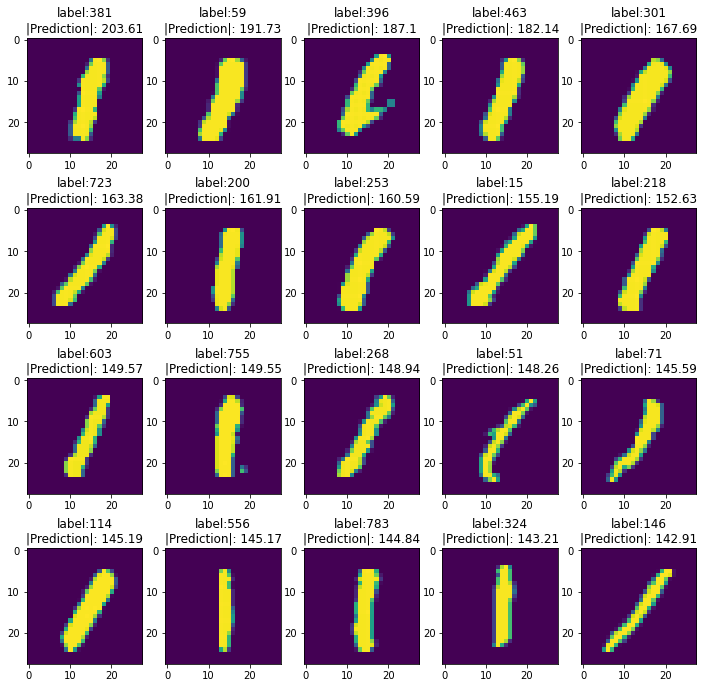

In [9]:
# Part C
# Visualize the 20 best scoring and 20 worst scoring images
# Use the distance from boundary: Absolute value

six_predict = {}
one_predict = {}

for i in range(0,len(images_test_new)):
    predict = np.dot(images_test_new[i], weights)
    if labels_test_new[i] == 6:
        six_predict[abs(predict)] = i
    if labels_test_new[i] == 1:
        one_predict[abs(predict)] = i
        
# 6 worst
print("Worst \"6\":")
f, axs = plt.subplots(figsize=(12,12))
for j in range(0,20):
    six_worst = six_predict[min(six_predict)]
    images_out = images_test_new[six_worst,:].reshape((28,28),order='F')
    plt.subplot(4,5,j+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(images_out)
    plt.title("label:" + str(six_worst) + "\n|Prediction|: " + str(round(min(six_predict),2)))
    six_predict.pop(min(six_predict))

plt.show()
print("----------------------------------------------------------------------------------------------")

# 6 best
print("Best \"6\":")
f, axs = plt.subplots(figsize=(12,12))
for j in range(0,20):
    six_best = six_predict[max(six_predict)]
    images_out = images_test_new[six_best,:].reshape((28,28),order='F')
    plt.subplot(4,5,j+1)
    plt.imshow(images_out)
    plt.title("label:" + str(six_best) + "\n|Prediction|: " + str(round(max(six_predict),2)))
    six_predict.pop(max(six_predict))
plt.show()
print("----------------------------------------------------------------------------------------------")

# 1 worst
print("Worst \"1\":")
f, axs = plt.subplots(figsize=(12,12))
for j in range(0,20):
    one_worst = one_predict[min(one_predict)]
    images_out = images_test_new[one_worst,:].reshape((28,28),order='F')
    plt.subplot(4,5,j+1)
    plt.imshow(images_out)
    plt.title("label:" + str(one_worst) + "\n|Prediction|: " + str(round(min(one_predict),2)))
    one_predict.pop(min(one_predict))
plt.show()
print("----------------------------------------------------------------------------------------------")

# 1 best
print("Best \"1\":")
f, axs = plt.subplots(figsize=(12,12))
for j in range(0,20):
    one_best = one_predict[max(one_predict)]
    images_out = images_test_new[one_best,:].reshape((28,28),order='F')
    plt.subplot(4,5,j+1)
    plt.imshow(images_out)
    plt.title("label:" + str(one_best) + "\n|Prediction|: " + str(round(max(one_predict),2)))
    one_predict.pop(max(one_predict))
plt.show()

# Part E

(e) Sort the data before training so that all ”1”s appear before ”6”s and plot the accuracy w.r.t. the number of iterations. Is this faster or slower in training? Explain why.

Text(0, 0.5, 'Accuracy')

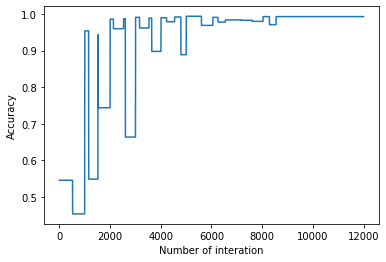

In [10]:
images_train_sort = images_train_new[0:1,:]
labels_train_sort = labels_train_new[0:1,:]
check = 0

# Set 1 ahead
for i in range(0,len(labels_train_new)):
    if labels_train_new[i][0] == 1:
        if check == 0:
            images_train_sort = images_train_new[i,:]
            labels_train_sort = labels_train_new[i,:]
            check = 1
        else:
            images_train_sort = np.vstack([images_train_sort,images_train_new[i,:]])
            labels_train_sort = np.vstack([labels_train_sort,labels_train_new[i,:]])
            
# Set 6 behind
for i in range(0,len(labels_train_new)):
    if labels_train_new[i][0] == 6:
        images_train_sort = np.vstack([images_train_sort,images_train_new[i,:]])
        labels_train_sort = np.vstack([labels_train_sort,labels_train_new[i,:]])


# set initial weights=[0,0,...0] weights:(1, 784)
weights =[]
for i in range(0, 784):
    weights = np.append(weights,[0])

# perceptron

y_train = 0      # Set "1" = label -1 / "6" = label +1
y_pre_train = 0  # predict label
y_test = 0       # Set "1" = label -1 / "6" = label +1
y_pre_test = 0   # predict label

accuracy = []
epoch = 12
for j in range(0,epoch):
    for i in range(0,len(images_train_sort)): # Training data
        predict = np.dot(images_train_sort[i], weights)
        if labels_train_sort[i] == 1:
            y_train = -1
        if labels_train_sort[i] == 6:
            y_train = 1
        if predict > 0:
            y_pre_train = 1
        else: #predict <=0
            y_pre_train = -1
        if y_train != y_pre_train:
            weights = weights + y_train * images_train_sort[i]

        # Test data
        count_acc = 0
        predict = 0
        for k in range(0,len(images_test_new)):
            predict = np.dot(images_test_new[k], weights)
            if labels_test_new[k] == 1:
                y_test = -1
            if labels_test_new[k] == 6:
                y_test = 1
            if predict > 0:
                y_pre_test = 1
            else: #predict <=0
                y_pre_test = -1
            if y_test == y_pre_test:
                count_acc = count_acc + 1
        
        accuracy.append(count_acc/len(images_test_new))
# print(accuracy)

#plot
from matplotlib import pyplot as plt
inter = list(range(1, epoch*1000 +1))
# print(inter)
plt.plot(inter,accuracy) 
plt.xlabel("Number of interation") 
plt.ylabel("Accuracy")

Answer for (e):

Non-sorted training data take about 6k iterations to meet performance saturation.  
Sorted training data take about 10k iterations to meet performance saturation.

It will become slower in training if we sort the data before training. Because if the data is sorted, the gradients for each batch at every epoch should point in a similar direction. It will easily become overfitting since the label in the beginning are the same. 

# Part F

(f) Repeat (a) with 10 training examples per class and compare with the result of (a).

In [11]:
# Set 10 training examples per class

images_train_20 = images_train_new[0:1,:]
labels_train_20 = labels_train_new[0:1,:]
check = 0
count_1 = 0
count_6 = 0

for i in range(0,len(labels_train_new)):
    if check == 0:
            images_train_20 = images_train_new[i,:]
            labels_train_20 = labels_train_new[i,:]

    if labels_train_new[i][0] == 1 and count_1 < 10:
        count_1 = count_1 + 1
        images_train_20 = np.vstack([images_train_20,images_train_new[i,:]])
        labels_train_20 = np.vstack([labels_train_20,labels_train_new[i,:]])
        
    if labels_train_new[i][0] == 6 and count_6 < 10:
        count_6 = count_6 + 1
        images_train_20 = np.vstack([images_train_20,images_train_new[i,:]])
        labels_train_20 = np.vstack([labels_train_20,labels_train_new[i,:]])
    
    check = check + 1
    
    if check == 20:
        break

Text(0, 0.5, 'Accuracy')

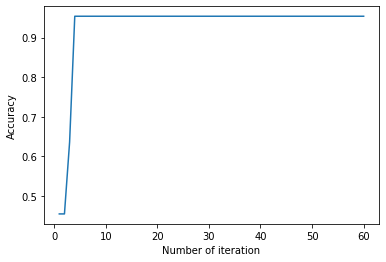

In [12]:
# set initial weights=[0,0,...0] weights:(1, 784)
weights =[]
for i in range(0, 784):
    weights = np.append(weights,[0])

# perceptron

y_train = 0      # Set "1" = label -1 / "6" = label +1
y_pre_train = 0  # predict label
y_test = 0       # Set "1" = label -1 / "6" = label +1
y_pre_test = 0   # predict label

accuracy = []
epoch = 3
for j in range(0,epoch):
    for i in range(0,len(images_train_20)): # Training data
        predict = np.dot(images_train_20[i], weights)
        if labels_train_20[i] == 1:
            y_train = -1
        if labels_train_20[i] == 6:
            y_train = 1
        if predict > 0:
            y_pre_train = 1
        else: #predict <=0
            y_pre_train = -1
        if y_train != y_pre_train:
            weights = weights + y_train * images_train_20[i]

        # Test data
        count_acc = 0
        predict = 0
        for k in range(0,len(images_test_new)):
            predict = np.dot(images_test_new[k], weights)
            if labels_test_new[k] == 1:
                y_test = -1
            if labels_test_new[k] == 6:
                y_test = 1
            if predict > 0:
                y_pre_test = 1
            else: #predict <=0
                y_pre_test = -1
            if y_test == y_pre_test:
                count_acc = count_acc + 1
        
        accuracy.append(count_acc/len(images_test_new))
# print(accuracy)
        
#plot
from matplotlib import pyplot as plt
inter = list(range(1,epoch * 20 +1))
# print(inter)
plt.plot(inter,accuracy)
plt.xlabel("Number of iteration") 
plt.ylabel("Accuracy")